# Parking Meters in Pittsburgh
*Notebook By Mark Sheffield*

### The purpose of this Notebook is to show where the least number of parking meters would be ###

## The Metric ##
Parking meters are all over the city of Pittsburgh, and if you have a car, the cost to park can add up if you have to constantly pay these fees. The metric within this Notebook will look at the number of parking meters in each neighborhood in order to find where it will make sense to park if you are on a stricter budget in the city.

## Limitations of the Data ##
The limitation of this data is that it does not show the cost of each parking meter, only that there is one at each location. Without the cost to park at each meter I can still analyze the number in the area, finding which neigborhood will give the most opportunites for free parking

## The Issues with Free Parking ##
If there are few parking meters in one specific area, that most likely means that there will be many private owned parking garages, meaning higher costs than what metered parking would be. 

## Analyzing the Dataset ##
This dataset includes a row for each parking meter in the city of Pittsburgh. 

Import the necessary resources before starting

In [2]:
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

%matplotlib inline

Read in the Parking meters CSV file

Below is what the input data looks like about the parking meter locations before any query masks are applied.

In [3]:
meters = pd.read_csv("https://data.wprdc.org/datastore/dump/9ed126cc-3c06-496e-bd08-b7b6b14b4109")
meters.head(10)

,id,location,location_type,latitude,longitude,status,zone,all_groups,guid,in_service_utc
0,410168-SCHEDR4402,SCHENLEY DR,On street,40.440574,-79.948103,Removed,410 - Oakland 4,410 - Oakland 4|Z - Inactive/Removed Terminals,EE7C4FB7-038A-461A-A667-002870BA4155,2012-08-27T11:24:43
1,421009-CEDAR-0302,CEDAR AVE,On street,40.451356,-80.001150,Active,421 - NorthSide,NORTHSIDE|421 - NorthSide,5BAC585B-FE5C-4090-ABF8-005D6C670EF1,2013-08-08T11:34:15
2,PBP 412083,FORBES MURRAY LOT,NaN,NaN,NaN,Active,412 - East Liberty,SQ.HILL1,137B2B44-7B23-46D7-A860-009598F38C4C,2021-06-21T18:16:49
3,409242-NDTHRG0106,N DITHRIDGE ST,On street,40.448784,-79.951793,Active,409 - Oakland 3,409 - Oakland 3|OAKLAND3,F4BDCD95-6853-413F-A1C6-009AF3F9D725,2012-09-04T16:08:27
4,PBP412,Virtual Terminal for ParkMobile,Virtual Zone,NaN,NaN,Active,412 - East Liberty,EASTLIB,8FAADCCE-A7BD-4988-85FC-00DCAB30782C,2015-10-23T16:56:58
5,426002-CENTRE1802,CENTRE AVE,On street,40.442621,-79.982096,Active,426 - Hill District,Hill District|426 - Hill District|HILL-DIST,DFCD9083-EE1C-477D-8F82-00F688A1F78C,2017-07-17T11:24:27
6,407118-MEYRAN0203,MEYRAN AVE,On street,40.439856,-79.957367,Active,407 - Oakland 1,OAKLAND1|407 - Oakland 1,E28258E3-6228-4B8C-AD29-012D6AE53A30,2012-08-13T12:25:00
7,402403-BLVDAL0004,BLVD OF ALLIES,On street,40.439707,-80.005472,Active,402 - Downtown 2,402 - Downtown 2|DOWNTOWN2,27D7B43B-71C7-48F2-A124-0193C266B650,2012-11-05T15:37:19
8,415018-ECARSN0701,E CARSON ST,On street,40.428684,-79.991694,Active,415 - SS & SSW,SOUTHSIDE|P10SouthSide|415 - SS & SSW,EB023D05-211C-4C76-9F03-01A548EBC0D0,2012-09-12T19:55:17
9,421054-WESTRN0802,WESTERN AVE,On street,40.452262,-80.014551,Active,421 - NorthSide,NORTHSIDE|421 - NorthSide,B99AF93A-D46B-4F2B-8AB4-01B2097712B6,2013-08-06T11:30:23


Filter out any Parking meters that are not active, or have a longitude with value NaN or Latitude with value NaN. Then apply the query mask. 

Shown below in the table is how the data is orignally displayed coming in from the CSV file, and after any query masks have been applied.

In [4]:
query_mask = meters['status'] == "Active" #Check for active meters
latitude_mask= meters['latitude'].notna() #Check latitude column
longitude_mask = meters['longitude'].notna() #Check longitude column

locations_active = meters[query_mask & latitude_mask & longitude_mask] #Applying query mask

Create a list of all the points in the form **(latitude, longitude)**. Then create a Geopandas Data Frame from
1. The Filtered Parking Meters
2. The Coordinate System of Latitude and Longitude
3. And the List of Geometry Objects Created

In [5]:
geometry = [Point(xy) for xy in zip(locations_active['longitude'], locations_active['latitude'])] #Utilizes Point function to create geometry objects for each point
geodata = gpd.GeoDataFrame(locations_active, crs='epsg:4326', geometry=geometry)

Plot the Geopandas DataFrame

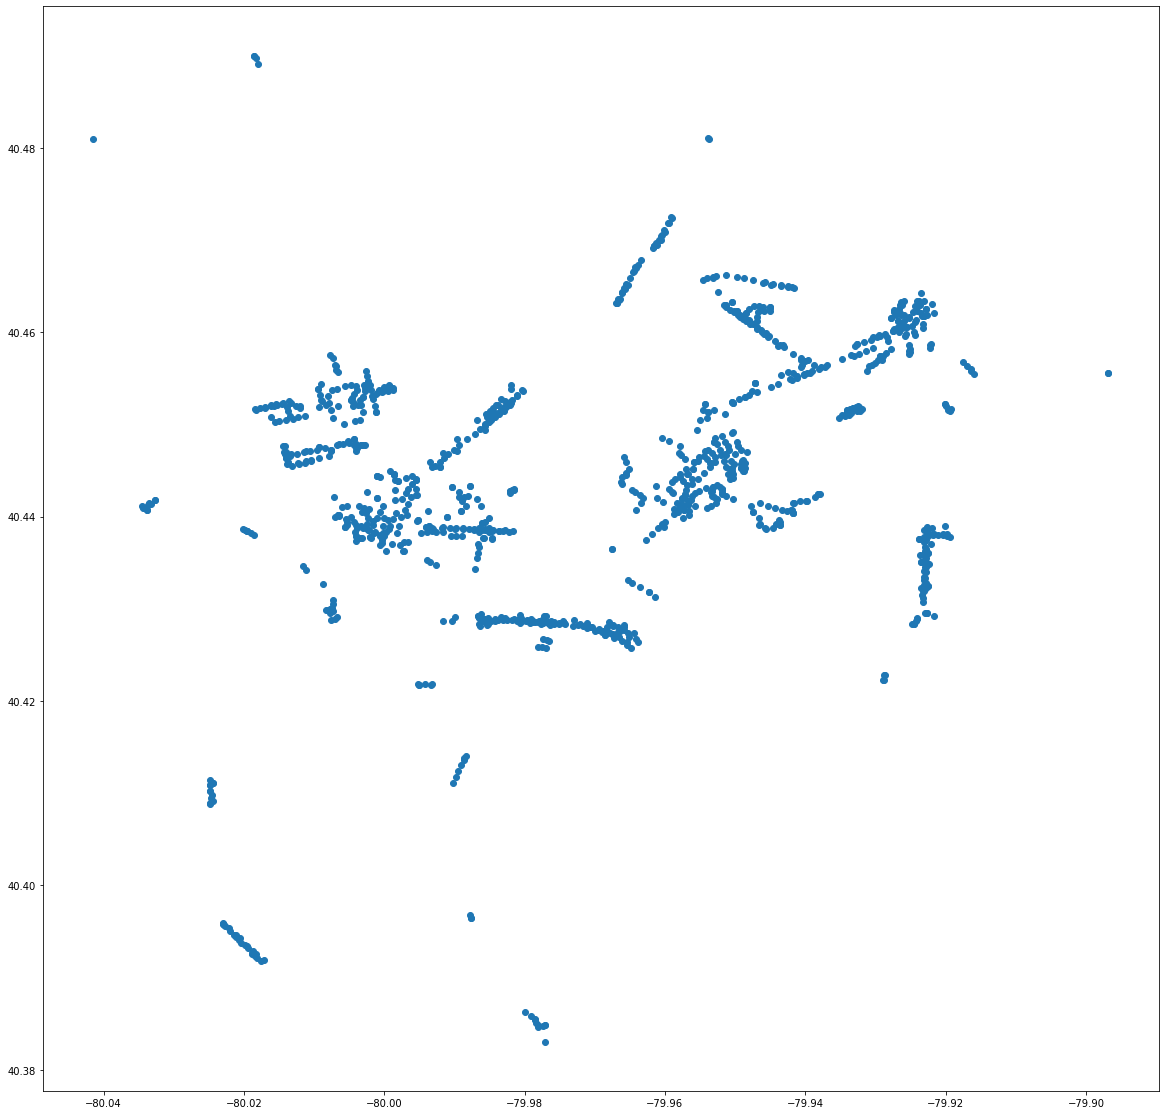

In [6]:
geodata.plot(figsize=(20,20)) #Change the size of the graph so points are visible
plt.show() #Display the graph

Read in the shapefile

Below the shapefile is plotted to display the city of Pittsburgh and all of its neighborhoods. All of the parking meters will soon be plotted on top of this to determine the best places to park.

In [7]:
neighborhood = gpd.read_file("Neighborhoods_.shp") #Read in the shapefile
neighborhood = neighborhood.to_crs(crs='EPSG:4326') #Convert the x and y axis to be latitude and longitude

Here we create subplots where we can graph the shapefile, and then the parking meter data on top. Then we are able to display it in 

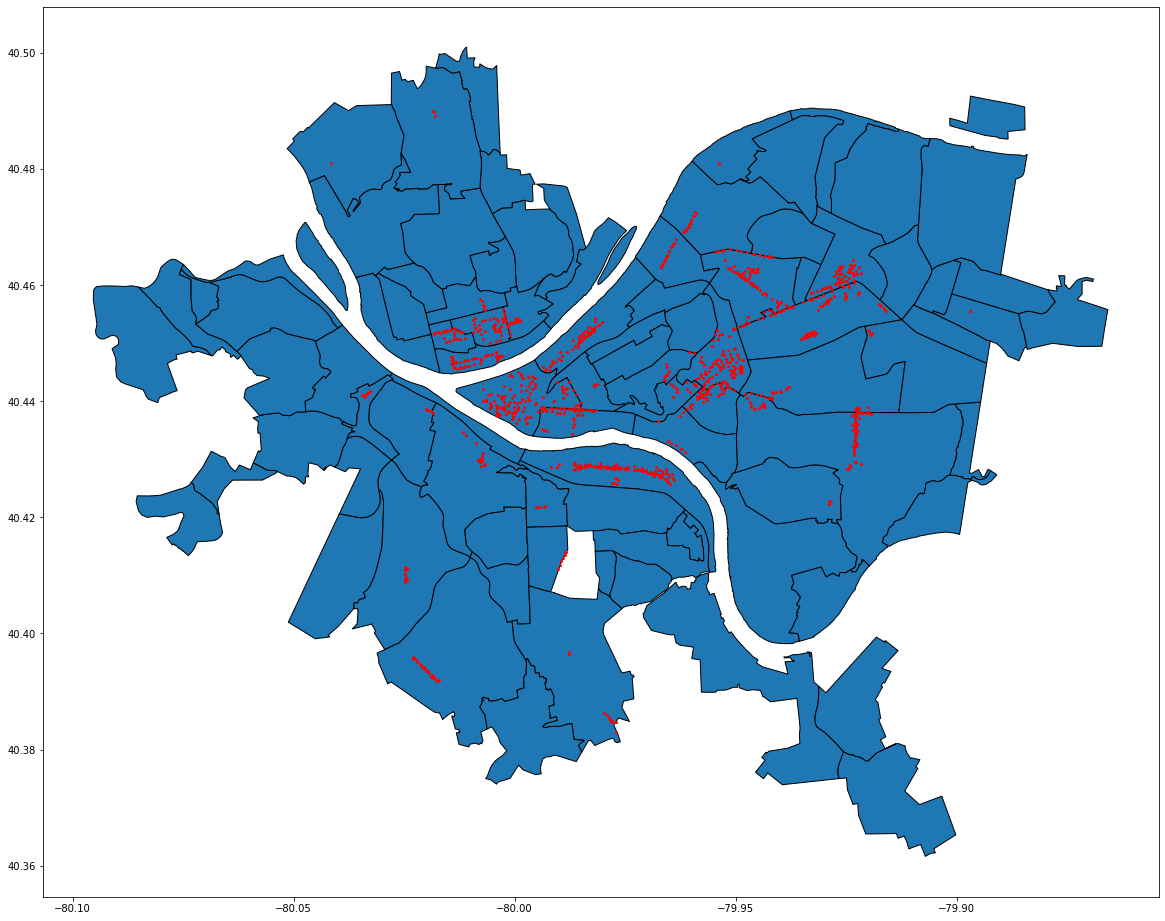

In [8]:
fig, ax = plt.subplots(figsize=(20,20))

neighborhood.plot(ax=ax, edgecolor='k',alpha=1,linewidth=1)
geodata.plot(ax=ax, color='red', marker="*", markersize=5)